## Topic 10 ##

### Descriptive Statistics: Correlation & Z Score ##

**Three different forms of correlation:**

1. Negative correlation
    The y values tend to decrease as the x values increase. 

2. Weak or no correlation
    The plot in the middle shows no obvious trend

3. Positive correlation
    The y values tend to increase as the x values increase

**Three correlation coefficients:**

    a. Pearson’s r
    b. Spearman’s rho
    c. Kendall’s tau

### 1. Example NumPy Correlation

In [4]:
import numpy as np
x = np.arange(10, 20) #create an array x of integers between 10 (inclusive) and 20 (exclusive).
x

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [8]:
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48]) #create a second array y containing arbitrary integers.

In [9]:
# Once you have two arrays of the same length, you can call np.corrcoef() 
r = np.corrcoef(x, y)
r

array([[1.        , 0.75864029],
       [0.75864029, 1.        ]])

In [10]:
print(r[0, 1])
print(r[1, 0])

0.7586402890911867
0.7586402890911869


In [11]:
"""
        x       y

x    1.00    0.76
y    0.76    1.00
"""

'\n        x       y\n\nx    1.00    0.76\ny    0.76    1.00\n'

### 2. Example: SciPy Correlation

In [19]:
import scipy.stats
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

In [20]:
scipy.stats.pearsonr(x, y)

(0.7586402890911869, 0.010964341301680832)

In [27]:
scipy.stats.spearmanr(x, y)
# the p-value in statistical methods when you’re testing a hypothesis. The p-value is an important measure that requires in-depth knowledge of probability and statistics to interpret.

SpearmanrResult(correlation=0.9757575757575757, pvalue=1.4675461874042197e-06)

In [22]:
scipy.stats.kendalltau(x, y)

KendalltauResult(correlation=0.911111111111111, pvalue=2.9761904761904762e-05)

In [26]:
# extract the correlation values as the items of tuples
print(scipy.stats.pearsonr(x, y)[0])
print(scipy.stats.spearmanr(x, y)[0])
print(scipy.stats.kendalltau(x, y)[0])

# extract the p-values as the items of tuples
print(scipy.stats.pearsonr(x, y)[1])
print(scipy.stats.spearmanr(x, y)[1])
print(scipy.stats.kendalltau(x, y)[1])

0.7586402890911869
0.9757575757575757
0.911111111111111
0.010964341301680832
1.4675461874042197e-06
2.9761904761904762e-05


In [28]:
#unpack the return value of correlation coefficients and p-value
r, p = scipy.stats.pearsonr(x, y)
print(r)
print(p)

0.7586402890911869
0.010964341301680832


### 3. Example: Pandas Correlation

In [41]:
import pandas as pd

x = pd.Series(range(10,20))
x

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64

In [42]:
y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
y

0     2
1     1
2     4
3     5
4     8
5    12
6    18
7    25
8    96
9    48
dtype: int64

In [43]:
x.corr(y) # Pearson's r

0.7586402890911867

In [45]:
y.corr(x) # Pearson's r

0.7586402890911869

In [46]:
x.corr(y, method='spearman') # Spearman's rho

0.9757575757575757

In [47]:
x.corr(y, method='kendall') # Kendall's tau

0.911111111111111

### 4. Linear Regression with SciPy 

In [49]:
import numpy as np
import scipy.stats

x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

In [50]:
result = scipy.stats.linregress(x, y)
result

LinregressResult(slope=7.4363636363636365, intercept=-85.92727272727274, rvalue=0.7586402890911869, pvalue=0.010964341301680825, stderr=2.257878767543913)

In [58]:
xy = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
               [2, 1, 4, 5, 8, 12, 18, 25, 96, 48]])

scipy.stats.linregress(xy)
#each array must have same length
#The usual way to represent it in Python, NumPy, SciPy, and Pandas is by using NaN or Not a Number values.
#But if your data contains nan values, then you won’t get a useful result with linregress():

LinregressResult(slope=7.4363636363636365, intercept=-85.92727272727274, rvalue=0.7586402890911869, pvalue=0.010964341301680825, stderr=2.257878767543913)

In [59]:
xy.T

array([[10,  2],
       [11,  1],
       [12,  4],
       [13,  5],
       [14,  8],
       [15, 12],
       [16, 18],
       [17, 25],
       [18, 96],
       [19, 48]])

In [60]:
scipy.stats.linregress(xy.T)

LinregressResult(slope=7.4363636363636365, intercept=-85.92727272727274, rvalue=0.7586402890911869, pvalue=0.010964341301680825, stderr=2.257878767543913)

In [61]:
scipy.stats.linregress(np.arange(3), np.array([2, np.nan, 5]))

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

### 5. Pearson Correlation with NumPy and SciPy

In [63]:
r, p = scipy.stats.pearsonr(x, y)
print(r)
print(p)

0.7586402890911869
0.010964341301680832


In [64]:
np.corrcoef(x, y)

array([[1.        , 0.75864029],
       [0.75864029, 1.        ]])

In [65]:
np.corrcoef(xy)

array([[1.        , 0.75864029],
       [0.75864029, 1.        ]])

In [66]:
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
                [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])

In [67]:
np.corrcoef(xyz)

array([[ 1.        ,  0.75864029, -0.96807242],
       [ 0.75864029,  1.        , -0.83407922],
       [-0.96807242, -0.83407922,  1.        ]])

In [68]:
"""
         x        y        z

x     1.00     0.76    -0.97
y     0.76     1.00    -0.83
z    -0.97    -0.83     1.00
"""

'\n         x        y        z\n\nx     1.00     0.76    -0.97\ny     0.76     1.00    -0.83\nz    -0.97    -0.83     1.00\n'

In [69]:
arr_with_nan = np.array([[0, 1, 2, 3],
                         [2, 4, 1, 8],
                         [2, 5, np.nan, 2]])

In [70]:
np.corrcoef(arr_with_nan)


array([[1.        , 0.62554324,        nan],
       [0.62554324, 1.        ,        nan],
       [       nan,        nan,        nan]])

In [71]:
xyz.T

array([[ 10,   2,   5],
       [ 11,   1,   3],
       [ 12,   4,   2],
       [ 13,   5,   1],
       [ 14,   8,   0],
       [ 15,  12,  -2],
       [ 16,  18,  -8],
       [ 17,  25, -11],
       [ 18,  96, -15],
       [ 19,  48, -16]])

In [72]:
np.corrcoef(xyz.T, rowvar=False)

array([[ 1.        ,  0.75864029, -0.96807242],
       [ 0.75864029,  1.        , -0.83407922],
       [-0.96807242, -0.83407922,  1.        ]])

### 6. Pearson Correlation: Pandas

In [80]:
import pandas as pd
# three Series objects called x, y, and z. You also have two DataFrame objects, xy and xyz.

x = pd.Series(range(10,20))
x

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64

In [81]:
y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
y

0     2
1     1
2     4
3     5
4     8
5    12
6    18
7    25
8    96
9    48
dtype: int64

In [82]:
z = pd.Series([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])
z

0     5
1     3
2     2
3     1
4     0
5    -2
6    -8
7   -11
8   -15
9   -16
dtype: int64

In [83]:
xy = pd.DataFrame({'x-values': x, 'y-values': y}) #rename column
xy

,x-values,y-values
0,10,2
1,11,1
2,12,4
3,13,5
4,14,8
5,15,12
6,16,18
7,17,25
8,18,96
9,19,48


In [84]:
xyz = pd.DataFrame({'x-values': x, 'y-values': y, 'z-values': z})
xyz

,x-values,y-values,z-values
0,10,2,5
1,11,1,3
2,12,4,2
3,13,5,1
4,14,8,0
5,15,12,-2
6,16,18,-8
7,17,25,-11
8,18,96,-15
9,19,48,-16


In [85]:
x.corr(y)

0.7586402890911867

In [86]:
u, u_with_nan = pd.Series([1, 2, 3]), pd.Series([1, 2, np.nan, 3])
v, w = pd.Series([1, 4, 8]), pd.Series([1, 4, 154, 8])

In [88]:
u.corr(v)

0.9966158955401239

In [89]:
u_with_nan.corr(w)

0.9966158955401239

In [90]:
corr_matrix = xy.corr()

In [91]:
corr_matrix

,x-values,y-values
x-values,1.00000,0.75864
y-values,0.75864,1.00000


In [97]:
corr_matrix.at['x-values', 'y-values']

0.7586402890911869

In [96]:
corr_matrix.iat[0, 1]

0.7586402890911869

In [94]:
xyz.corr()

,x-values,y-values,z-values
x-values,1.000000,0.758640,-0.968072
y-values,0.758640,1.000000,-0.834079
z-values,-0.968072,-0.834079,1.000000


In [95]:
xy.corrwith(z)

x-values   -0.968072
y-values   -0.834079
dtype: float64

### 7. Rank SciPy 

In [99]:
import numpy as np
import scipy.stats

In [100]:
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
z = np.array([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])

In [101]:
scipy.stats.rankdata(x)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [102]:
scipy.stats.rankdata(y)

array([ 2.,  1.,  3.,  4.,  5.,  6.,  7.,  8., 10.,  9.])

In [103]:
scipy.stats.rankdata(z)

array([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])

In [104]:
scipy.stats.rankdata([8, 2, 0, 2])

array([4. , 2.5, 1. , 2.5])

In [106]:
#rankdata() treats nan values as if they were large
scipy.stats.rankdata([8, np.nan, 0, 2])

array([3., 4., 1., 2.])

In [107]:
np.argsort(y) + 1

array([ 2,  1,  3,  4,  5,  6,  7,  8, 10,  9])

### 8. Rank Correlation with NumPy and SciPy

In [109]:
result = scipy.stats.spearmanr(x, y)
result

SpearmanrResult(correlation=0.9757575757575757, pvalue=1.4675461874042197e-06)

In [110]:
rho, p = scipy.stats.spearmanr(x, y)
print(rho)
print(p)

0.9757575757575757
1.4675461874042197e-06


In [111]:
xy = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
               [2, 1, 4, 5, 8, 12, 18, 25, 96, 48]])

In [112]:
rho, p = scipy.stats.spearmanr(xy, axis=1)
print(rho)
print(p)

0.9757575757575757
1.4675461874042197e-06


In [113]:
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
                [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])

In [114]:
corr_matrix, p_matrix = scipy.stats.spearmanr(xyz, axis=1)
corr_matrix

array([[ 1.        ,  0.97575758, -1.        ],
       [ 0.97575758,  1.        , -0.97575758],
       [-1.        , -0.97575758,  1.        ]])

In [115]:
p_matrix

array([[6.64689742e-64, 1.46754619e-06, 6.64689742e-64],
       [1.46754619e-06, 6.64689742e-64, 1.46754619e-06],
       [6.64689742e-64, 1.46754619e-06, 6.64689742e-64]])

In [116]:
result = scipy.stats.kendalltau(x, y)
result

KendalltauResult(correlation=0.911111111111111, pvalue=2.9761904761904762e-05)

In [117]:
result.correlation

0.911111111111111

In [118]:
tau, p = scipy.stats.kendalltau(x, y)
tau

0.911111111111111

### 9.Rank Correlation with Pandas

In [119]:
x, y, z = pd.Series(x), pd.Series(y), pd.Series(z)
xy = pd.DataFrame({'x-values': x, 'y-values': y})
xyz = pd.DataFrame({'x-values': x, 'y-values': y, 'z-values': z})

In [120]:
x.corr(y, method='spearman')

0.9757575757575757

In [121]:
xy.corr(method='spearman')

,x-values,y-values
x-values,1.000000,0.975758
y-values,0.975758,1.000000


In [122]:
xyz.corr(method='spearman')

,x-values,y-values,z-values
x-values,1.000000,0.975758,-1.000000
y-values,0.975758,1.000000,-0.975758
z-values,-1.000000,-0.975758,1.000000


In [123]:
xy.corrwith(z, method='spearman')

x-values   -1.000000
y-values   -0.975758
dtype: float64

In [124]:
x.corr(y, method='kendall')

0.911111111111111

In [125]:
xy.corr(method='kendall')

,x-values,y-values
x-values,1.000000,0.911111
y-values,0.911111,1.000000


In [126]:
xyz.corr(method='kendall')

,x-values,y-values,z-values
x-values,1.000000,0.911111,-1.000000
y-values,0.911111,1.000000,-0.911111
z-values,-1.000000,-0.911111,1.000000


In [127]:
xy.corrwith(z, method='kendall')

x-values   -1.000000
y-values   -0.911111
dtype: float64

### 10. Visualization of Correlation

In [132]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [131]:
import numpy as np
import scipy.stats
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
z = np.array([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
                [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])

### 11. X-Y Plots With a Regression Line

In [134]:
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

In [135]:
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

'Regression line: y=-85.93+7.44x, r=0.76'

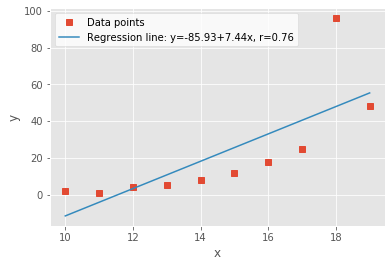

In [136]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

### 12. Heatmaps of Correlation Matric

In [137]:
corr_matrix = np.corrcoef(xyz).round(decimals=2)
corr_matrix

array([[ 1.  ,  0.76, -0.97],
       [ 0.76,  1.  , -0.83],
       [-0.97, -0.83,  1.  ]])

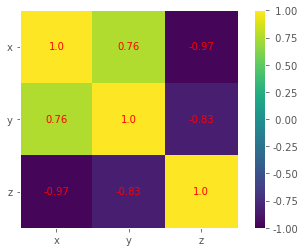

In [138]:
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()

### 13. Z-Score

In [140]:
#Z-Score = (Raw Mark — Mean) / St. Dev
chemistry = [50, 60, 70, 80, 90]
math = [30, 40, 50, 60, 70]
physics = [10, 30, 50, 70, 90]

In [141]:
from scipy import stats
print(stats.zscore(chemistry))
print(stats.zscore(math))
print(stats.zscore(physics))

[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]
[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]
[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]
